In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

%matplotlib inline

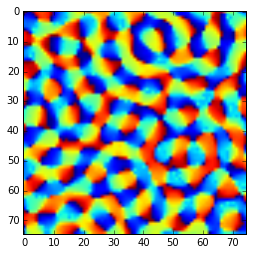

In [3]:
# load orientation preference map

data = scipy.io.loadmat('orientation-map.mat')
OP_map = data['map']

plt.figure()
plt.imshow(OP_map)

<matplotlib.contour.QuadContourSet instance at 0x1077ffbd8>

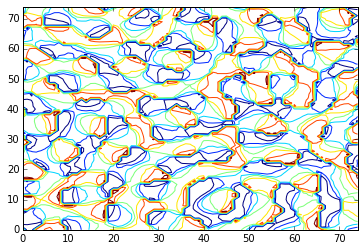

In [4]:
plt.figure()
plt.contour(OP_map)

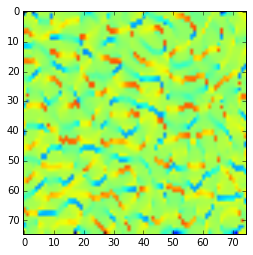

In [10]:
plt.figure()
# plt.imshow(np.gradient(OP_map))
OP_grad = np.gradient(OP_map)[0]
plt.imshow( OP_grad )

[[-167.43396226  -82.01886792   85.0754717  ...,  -21.73584906
    -5.09433962   -1.69811321]
 [   6.79245283    2.03773585   -5.60377358 ...,   -8.83018868
   -10.01886792   -7.81132075]
 [  -1.01886792   -1.86792453   -2.88679245 ...,    1.52830189
    -2.03773585   -4.0754717 ]
 ..., 
 [ 113.43396226   54.33962264   -3.39622642 ...,  -77.26415094
   -80.66037736    7.47169811]
 [  59.77358491   35.32075472    5.43396226 ...,  -76.75471698
     5.94339623    3.39622642]
 [  43.13207547   28.52830189    9.50943396 ...,   -2.54716981
    -0.16981132   -0.33962264]]
[[-160.30188679   13.9245283     7.81132075 ...,   28.86792453
    25.13207547   19.01886792]
 [ -70.47169811   12.73584906    9.67924528 ...,   19.18867925
    23.43396226   22.24528302]
 [  14.43396226    9.8490566    11.37735849 ...,    7.30188679
    17.83018868   27.67924528]
 ..., 
 [ -61.30188679  -21.56603774  -10.69811321 ...,  -78.28301887
   -78.79245283    4.41509434]
 [  18.33962264  -16.81132075   -7.47169811 .

<matplotlib.contour.QuadContourSet instance at 0x107663ab8>

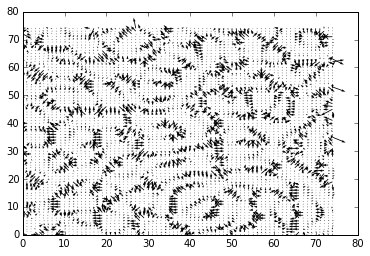

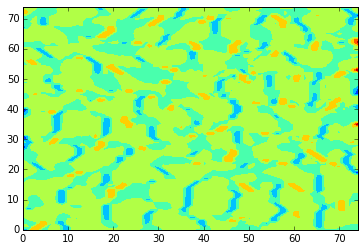

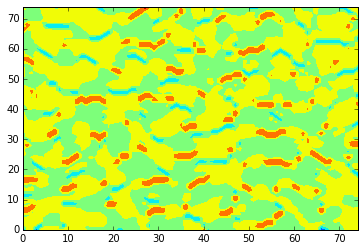

In [6]:
plt.figure()
# plt.imshow(np.gradient(OP_map))
dx = 1
dy = 1
nabla_Y, nabla_X = np.gradient(OP_map,dx,dy)
xv, yv = np.meshgrid( np.arange(0, 75, dx), np.arange(0, 75, dx) )

print nabla_X
print nabla_Y

plt.quiver( xv, yv, nabla_X, nabla_Y )

# plt.contour( OP_map, colors='r')
# plt.hold(True)
# plt.contour(OP_grad, colors='g') # contour of the OP gradient - should be orthogonal

plt.figure()
plt.contourf( nabla_X )

plt.figure()
plt.contourf( nabla_Y )

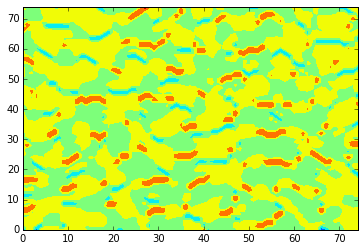

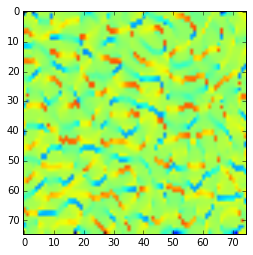

In [91]:
plt.figure()
plt.contourf(OP_grad)
# plt.contour(OP_grad, colors='k')
# plt.contour(OP_map, colors='k')

plt.figure()
plt.imshow(OP_grad)

In [5]:
def inverse_gradient(gradient_x, gradient_y, seed):
    scalar_field = np.zeros(gradient_x.size)
    scalar_field[0] = seed
    
    limit = gradient_x[0].size
    
    for i in range(1, scalar_field.size):
        xi = np.mod(i, limit)
        yi = i/limit

        # boundary conditions
        if xi == 0:
            if yi == 1:
                # use the Y gradient, first order
                scalar_field[i] = gradient_y[yi-1,xi] + scalar_field[i-limit]
            else:
                # use Y gradient, second order:
                scalar_field[i] = gradient_y[yi-1,xi]*2 + scalar_field[i-2*limit]

        elif xi == 1:
            # use x gradient, first order:
            scalar_field[i] = gradient_x[yi,xi-1] + scalar_field[i-1]
        else:
            # use the X gradient, second order
            scalar_field[i] = gradient_x[yi,xi-1]*2 + scalar_field[i-2]
    return scalar_field.reshape(gradient_x.shape[0], gradient_x.shape[1])

SF = inverse_gradient(nabla_X, nabla_Y, OP_map[0,0])

x = np.array([[1,2,6],[3,4,5],[4,7,8]])
ny,nx = np.gradient(x)

rx = inverse_gradient(nx,ny,x[0,0])

print OP_map
print '======================'
print SF

plt.figure()
plt.imshow(OP_map)
plt.colorbar()

plt.figure()
plt.imshow(SF)
plt.colorbar()

print np.where(SF==OP_map)[0].size

NameError: name 'nabla_X' is not defined

[[  1.00000000e+00   1.61301887e+02  -2.68490566e+01 ...,   1.05926415e+03
    7.84849057e+02   1.00900000e+03]
 [ -1.66433962e+02  -9.59622642e+01  -1.91905660e+02 ...,   4.47603774e+02
    6.98415094e+02   4.00735849e+02]
 [  1.45849057e+01   1.50943396e-01  -5.11320755e+00 ...,   7.50377358e+01
    4.18226415e+02   3.93773585e+01]
 ..., 
 [ -1.03349057e+03  -9.72188679e+02  -9.90358491e+02 ...,  -1.60473585e+03
   -9.76603774e+02  -1.44715094e+03]
 [ -7.07113208e+02  -7.25452830e+02  -6.73490566e+02 ...,  -2.09905660e+02
   -4.51886792e+01  -2.42509434e+02]
 [ -9.13943396e+02  -9.19716981e+02  -8.92207547e+02 ...,   2.31264151e+02
   -4.28113208e+01   1.91188679e+02]]
[[ 160.30188679  -13.9245283    -7.81132075 ...,  -28.86792453
   -25.13207547  -19.01886792]
 [  70.47169811  -12.73584906   -9.67924528 ...,  -19.18867925
   -23.43396226  -22.24528302]
 [ -14.43396226   -9.8490566   -11.37735849 ...,   -7.30188679
   -17.83018868  -27.67924528]
 ..., 
 [  61.30188679   21.56603774  

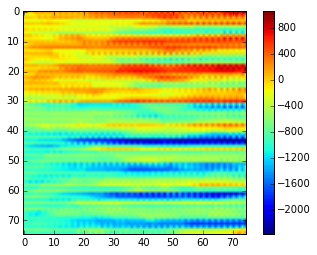

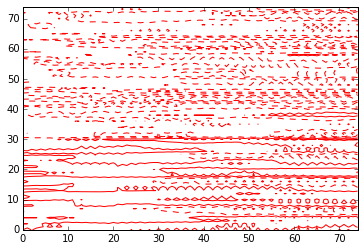

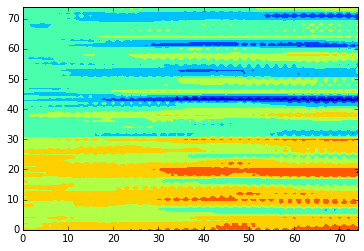

In [108]:
SF_grad_x = -nabla_Y
SF_grad_y = nabla_X

SF_map = inverse_gradient(SF_grad_x, SF_grad_y, 1)

plt.figure()
plt.imshow( SF_map )
plt.colorbar()

plt.figure()
plt.contour(SF_map, colors='r')
# plt.contour(OP_map, colors='k')

plt.figure()
plt.contourf(SF_map)

print SF_map
print'================'
print SF_grad_x

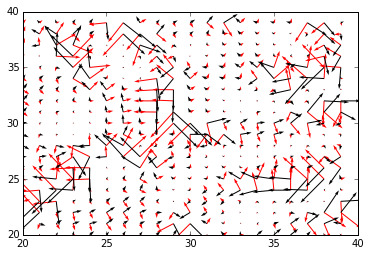

In [106]:


plt.figure()
xv, yv = np.meshgrid( np.arange(20,40), np.arange(20,40) )
plt.quiver(xv, yv, nabla_X[20:40, 20:40], nabla_Y[20:40, 20:40], color='r')

# plt.figure()
plt.quiver(xv, yv, SF_grad_x[20:40, 20:40], SF_grad_y[20:40, 20:40])


<matplotlib.contour.QuadContourSet instance at 0x10a837200>

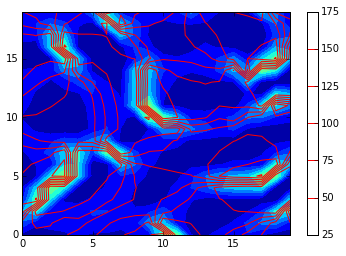

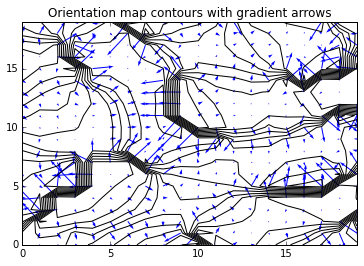

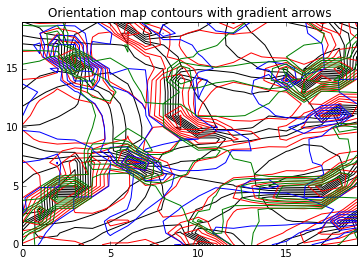

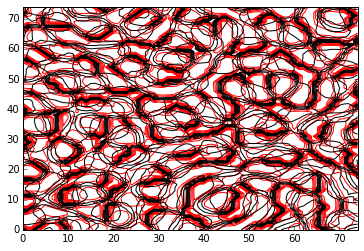

In [17]:
plt.figure()
g_sum = np.sqrt(nabla_X**2 + nabla_Y**2)

g_levels = np.linspace(np.min(g_sum), np.max(g_sum), 15)

plt.contourf(g_sum[20:40,20:40], levels=g_levels)
plt.contour(OP_map[20:40,20:40], colors='r')
plt.colorbar()

xv, yv = np.meshgrid( np.arange(20), np.arange(20) )
plt.figure()
plt.contour(OP_map[20:40,20:40], levels=g_levels, colors='k')
plt.quiver(xv, yv, nabla_X[20:40, 20:40], nabla_Y[20:40, 20:40], color='b') 
plt.title("Orientation map contours with gradient arrows")

plt.figure()
plt.contour(OP_map[20:40,20:40], colors='k')
# plt.quiver(xv, yv, nabla_X[20:40, 20:40], nabla_Y[20:40, 20:40], color='b') 
plt.contour(g_sum[20:40,20:40], levels=g_levels, colors='r')
plt.contour(nabla_X[20:40,20:40], levels=g_levels, colors='b')
plt.contour(nabla_Y[20:40,20:40], levels=g_levels, colors='g')
plt.title("Orientation map contours with gradient arrows")

plt.figure()
# plt.contour(g_sum[20:40,20:40], levels=g_levels, colors='r')
# plt.contour(OP_map[20:40,20:40], colors='k')
plt.contour(g_sum, levels=g_levels, colors='r')
plt.contour(OP_map, colors='k')


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


<matplotlib.contour.QuadContourSet instance at 0x11ac28290>

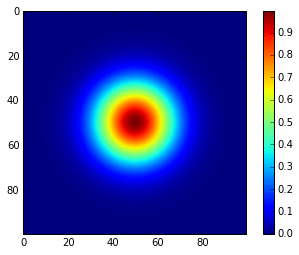

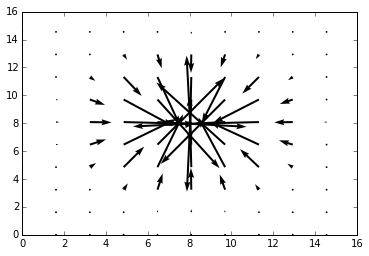

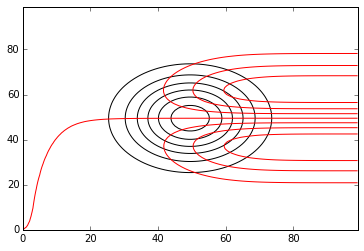

In [127]:
%time 
x_range = np.linspace(0,16,100)
xv, yv = np.meshgrid(x_range, x_range)
sigma = 2
gaussian = np.exp( -1*( ( xv-8)**2 + (yv-8)**2) / (2*sigma**2) )

plt.imshow(gaussian)
plt.colorbar()

plt.figure()
ygrad,xgrad = np.gradient(gaussian)
plt.quiver(xv[0:100:10,0:100:10], yv[0:100:10,0:100:10], xgrad[0:100:10,0:100:10], ygrad[0:100:10,0:100:10])

plt.figure()
plt.contour(gaussian, colors='k')
# plt.contour(np.sqrt(ygrad**2 + xgrad**2))
# plt.contour(ygrad, colors='r')
# plt.contour(xgrad, colors='b')
inverse = inverse_gradient(-ygrad,xgrad,100)
plt.contour(inverse, colors='r')